# **Time Series Breakdown of Retail Sales**

```python
Loading the Dataset
```

In [3]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv("train.csv")
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")

# Preview the datasets
train_preview = display(train_df.head())
features_preview = display(features_df.head())
stores_preview = display(stores_df.head())

train_df.info(), features_df.info(), stores_df.info(), train_preview, features_preview, stores_preview


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4  

(None, None, None, None, None, None)

```python
Data Preprocessing & Merge
```

In [5]:
import pandas as pd
from IPython.display import display

# Load datasets
train_df = pd.read_csv("train.csv")
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")

# Step 1: Data Preprocessing & Merge

# Convert 'Date' columns to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'], dayfirst=True)  # fix applied here ✅

# Merge train with features on ['Store', 'Date', 'IsHoliday']
merged_df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge with store info
merged_df = pd.merge(merged_df, stores_df, on='Store', how='left')

# Add a 'Month' column for aggregation
merged_df['Month'] = merged_df['Date'].dt.to_period('M').dt.to_timestamp()

# Show dataset structure and preview
display(merged_df.info())
display(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

None

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010-02-01
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010-02-01
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010-02-01
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010-02-01
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010-03-01


```python
Plot trends
```

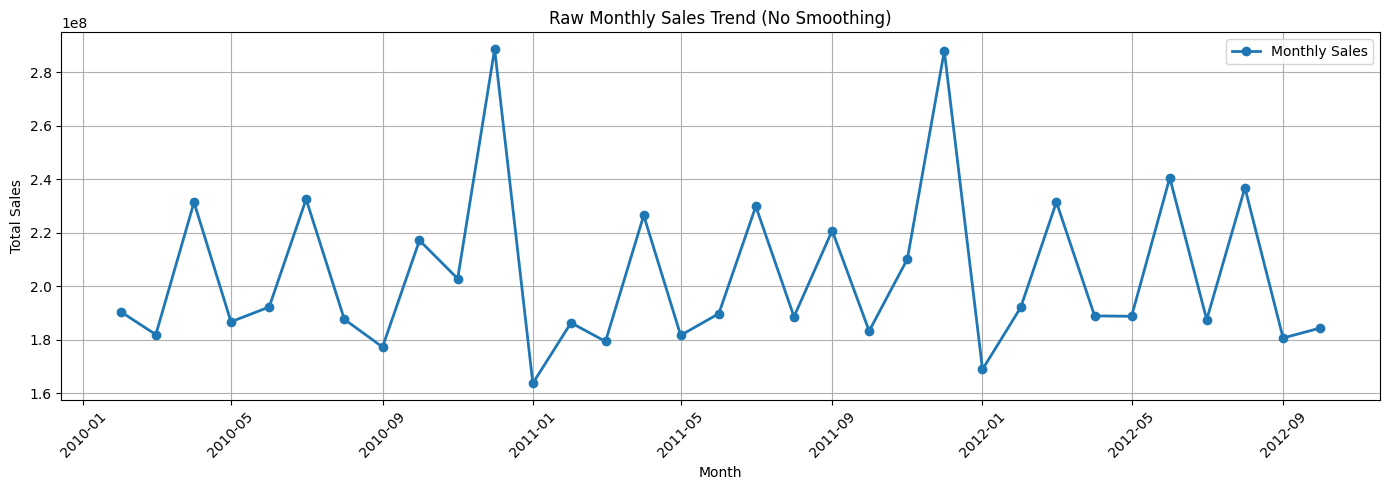

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#Monthly Sales Aggregation
monthly_sales = merged_df.groupby('Month')['Weekly_Sales'].sum().reset_index()
monthly_sales['Moving_Avg_3'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()

#Convert to Time Series
ts_data = monthly_sales.set_index('Month')
ts_data = ts_data.asfreq('MS')  # 'MS' = Month Start

#Seasonal Decomposition
decomposition = seasonal_decompose(ts_data['Weekly_Sales'], model='additive')

#Raw Monthly Sales Trend
plt.figure(figsize=(14, 5))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], marker='o', label='Monthly Sales', linewidth=2)
plt.title('Raw Monthly Sales Trend (No Smoothing)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





```python
Monthly Sales Trends & Moving Average
```

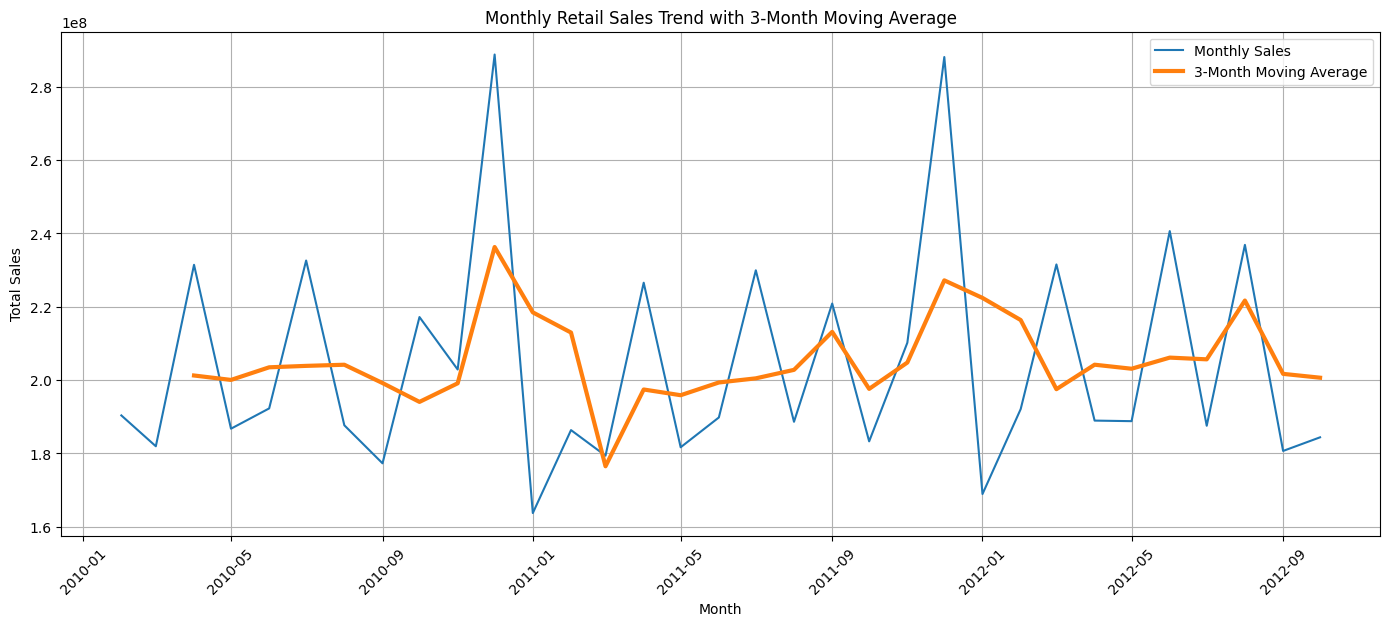

In [6]:
import matplotlib.pyplot as plt

# Step 2: Monthly Sales Trends & Moving Average

# Group by Month to get total sales
monthly_sales = merged_df.groupby('Month')['Weekly_Sales'].sum().reset_index()

# Calculate 3-month moving average
monthly_sales['Moving_Avg_3'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], label='Monthly Sales')
plt.plot(monthly_sales['Month'], monthly_sales['Moving_Avg_3'], label='3-Month Moving Average', linewidth=3)
plt.title('Monthly Retail Sales Trend with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [16]:
pip install statsmodels



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


```python
Seasonal Decomposition
```

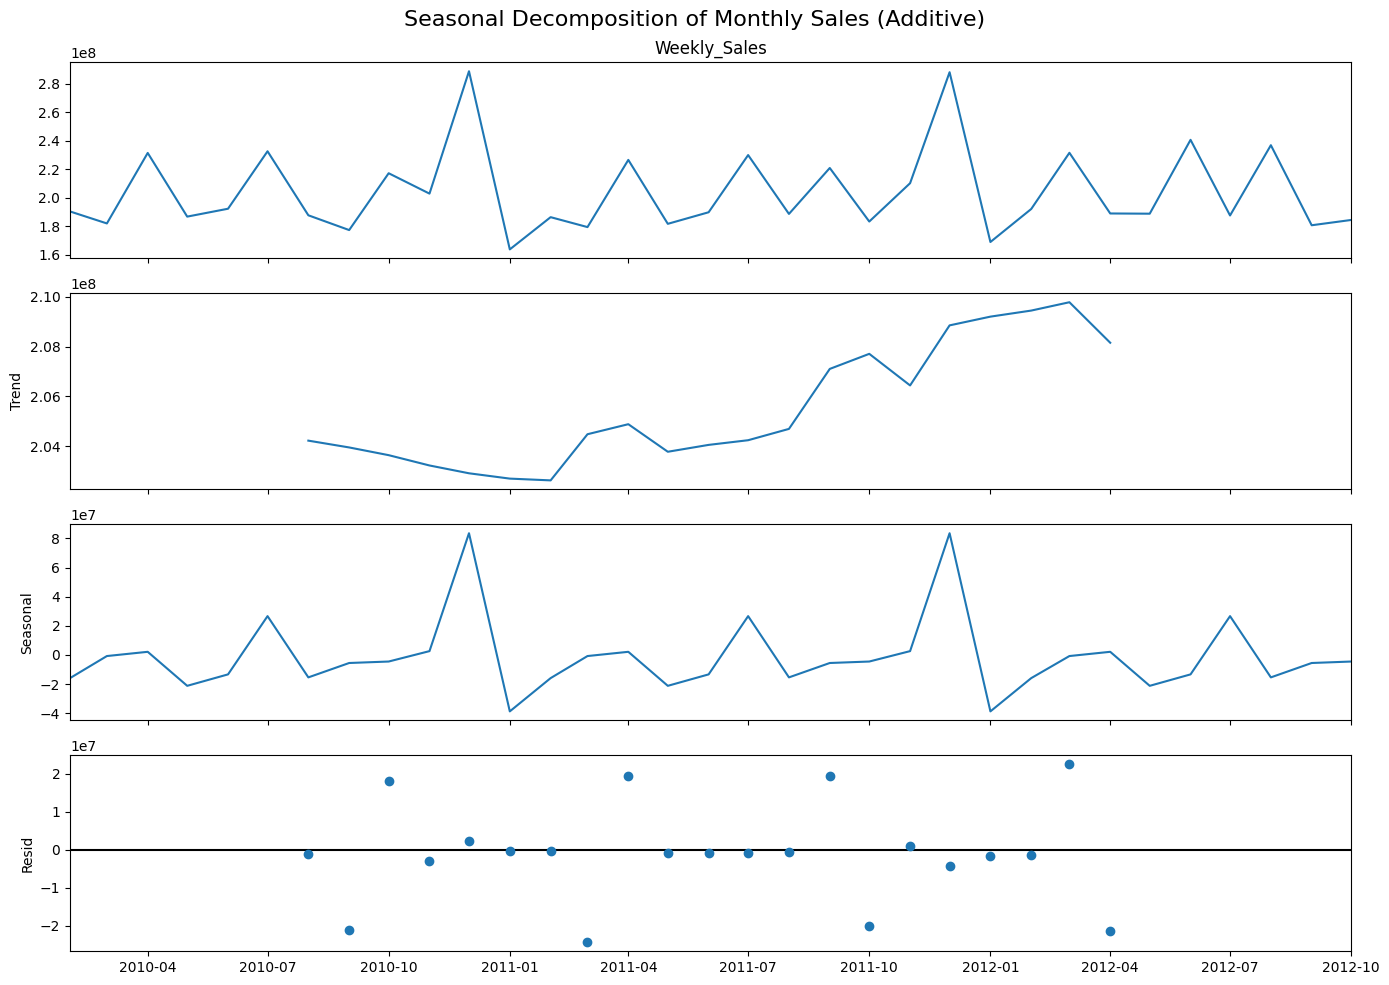

In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose

# For seasonal decomposition, we need the time series to have a fixed frequency
# We'll set the 'Month' column as the index and ensure it's sorted
ts_data = monthly_sales.set_index('Month')
ts_data = ts_data.asfreq('MS')  # MS = Month Start frequency

# Perform additive seasonal decomposition
decomposition = seasonal_decompose(ts_data['Weekly_Sales'], model='additive')

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Monthly Sales (Additive)', fontsize=16)
plt.tight_layout()
plt.show()


```python
Revenue by product and region over time
```

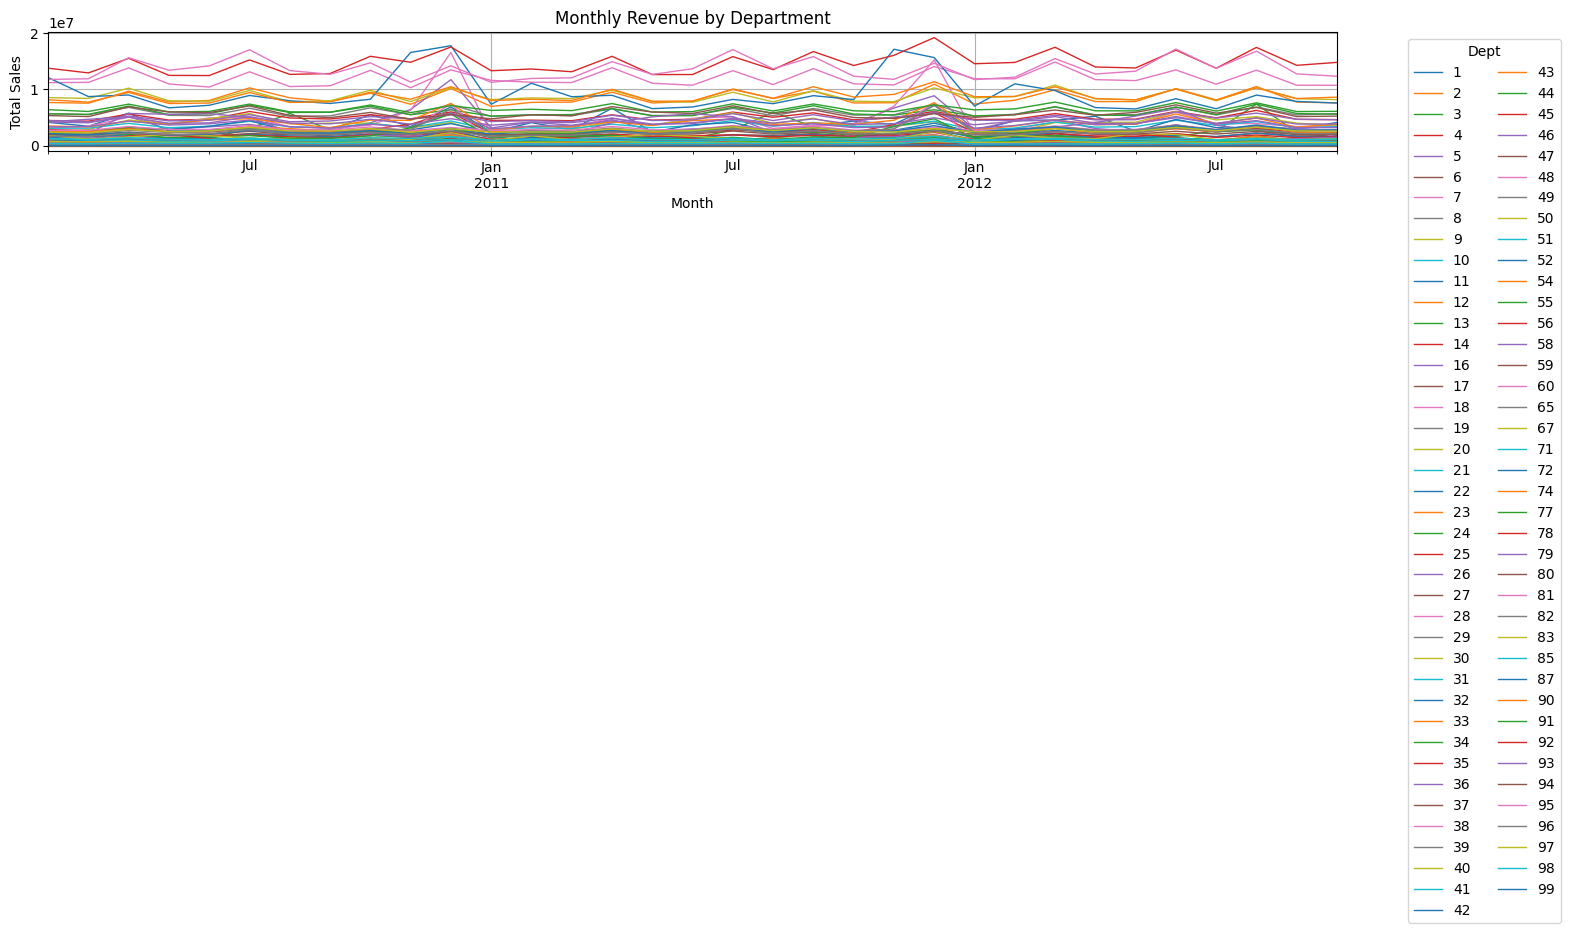

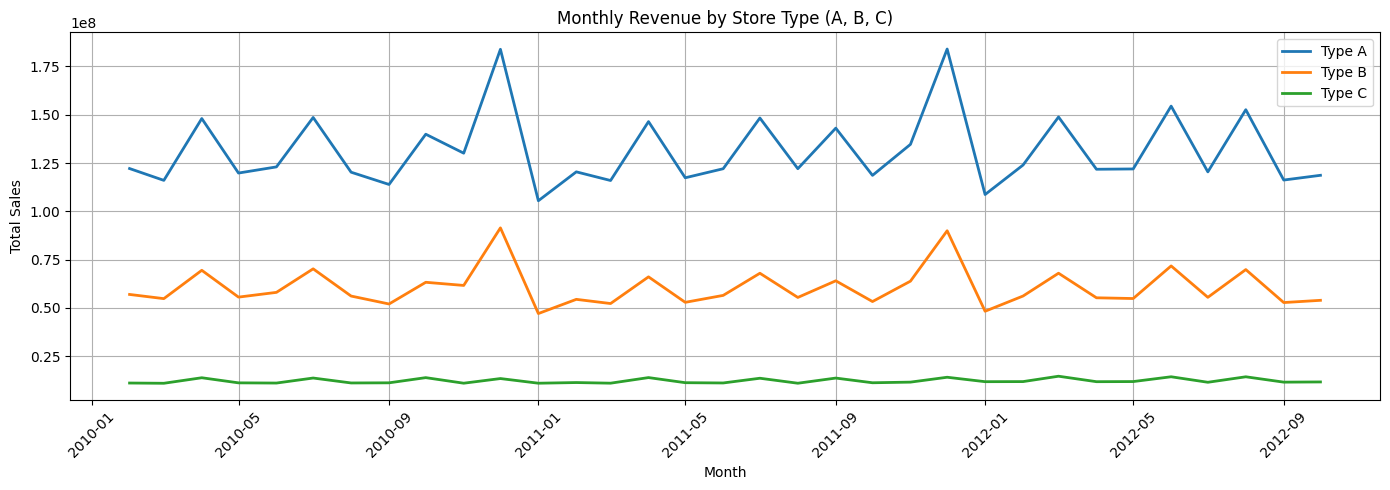

In [ ]:
import matplotlib.pyplot as plt

# === Part 1: Revenue by Department ===
dept_monthly_sales = merged_df.groupby(['Month', 'Dept'])['Weekly_Sales'].sum().reset_index()
dept_pivot = dept_monthly_sales.pivot(index='Month', columns='Dept', values='Weekly_Sales').fillna(0)

# Line chart for department revenue over time
plt.figure(figsize=(16, 6))
dept_pivot.plot(ax=plt.gca(), linewidth=1)
plt.title('Monthly Revenue by Department')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Dept', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# === Part 2: Revenue by Store Type  ===
type_monthly_sales = merged_df.groupby(['Month', 'Type'])['Weekly_Sales'].sum().reset_index()
type_pivot = type_monthly_sales.pivot(index='Month', columns='Type', values='Weekly_Sales')

# Plot store type revenue trend
plt.figure(figsize=(14, 5))
for col in type_pivot.columns:
    plt.plot(type_pivot.index, type_pivot[col], label=f'Type {col}', linewidth=2)

plt.title('Monthly Revenue by Store Type (A, B, C)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


```python
Bonus:Forecast
```

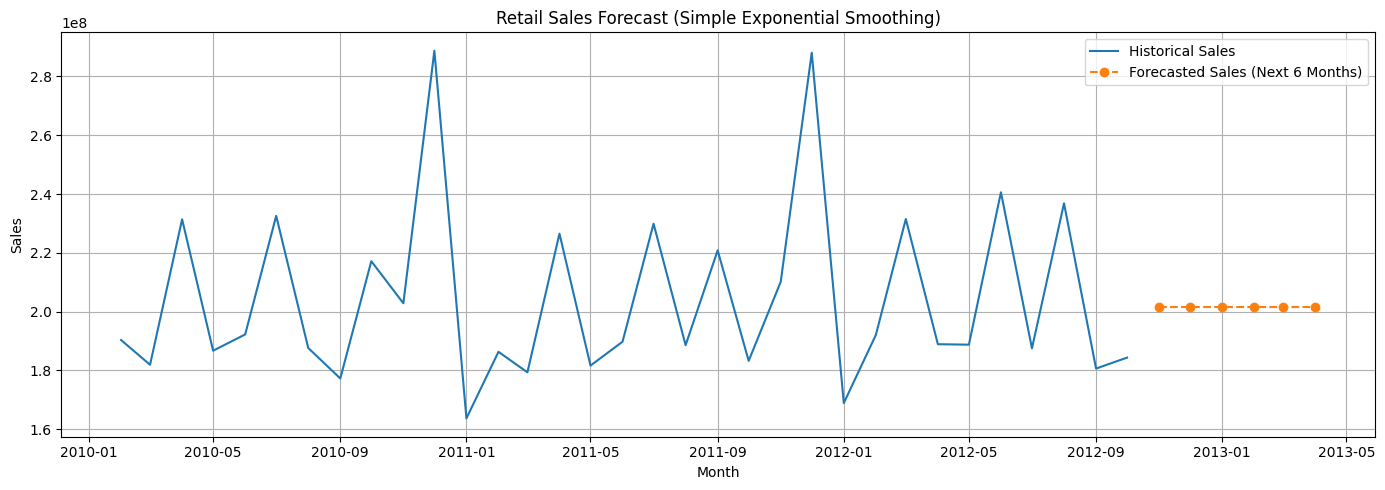

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Prepare time series
ts = monthly_sales.set_index('Month')['Weekly_Sales']
ts = ts.asfreq('MS')  # Ensure Monthly frequency

#Fit Exponential Smoothing model
model = SimpleExpSmoothing(ts, initialization_method="heuristic").fit(smoothing_level=0.2)

#Forecast next 6 months
forecast = model.forecast(6)

#Plot actual + forecast
plt.figure(figsize=(14, 5))
plt.plot(ts, label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales (Next 6 Months)', linestyle='--', marker='o')
plt.title('Retail Sales Forecast (Simple Exponential Smoothing)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
